<function matplotlib.pyplot.show>

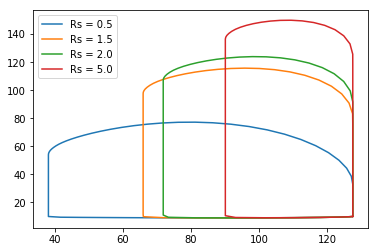

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 18 10:31:32 2018

"""

import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt
import math

def elastance(t):
    tp = 0.35 #peak contraction time
    ts = 0.8  #total contraction time
    T = 1.0 # heart period
    t = t % T
    return np.piecewise(t,[t<tp,np.logical_and(tp<=t,t<ts),t>=ts],
                        [lambda x: np.sin(math.pi*x/(2*tp))**2,
                         lambda x: np.cos(math.pi*(x-tp)/(2*(ts-tp)))**2,
                         0])


def firstorder(PsVv,t, Rs_arg):
    #print("q",Ps)
    Ps=PsVv[0] # lumped systemic circulation pressure
    Vv=PsVv[1] # left ventricular volume
    Cs = 2.75  # compliance resistance
    Rs = Rs_arg
    #Rs = 1     # systemic resistance
    f=elastance(t)
    a = 0.0007
    b = 8
    c = 1.5
    d = 0.9
    Pv = a*(Vv-b)**2 + (c*Vv-d)*f # left ventricular pressure
    Pr = 10 #filing pressure from venous reservoir
    Rin = 0.001 #input filling resistance
    Ro = 0.06 #resistance of aorta
    Q_in = np.piecewise(Pv,[Pr>Pv,Pr<=Pv],[lambda x: (Pr-x)/Rin,0])
    Q_out = np.piecewise(Pv,[Pv>Ps,Pv<=Ps],[lambda x:(x-Ps)/Ro,0]) 
    dPsdt = Q_out/Cs - Ps/(Rs*Cs)  
    dVvdt = Q_in - Q_out
    #print(dPsdt)
    return np.array([dPsdt,dVvdt])

for i in [0.5, 1.5, 2.0, 5.0]:
    t=np.linspace(0,10,1000)
    PsVv = odeint(firstorder,[0,10],t, args = (i,))
    Vv = PsVv[900:,1]  ## how do we know the steady state ?
    f = elastance(t)[900:]
    a = 0.0007
    b = 8
    c = 1.5
    d = 0.9
    Pv = a*(Vv-b)**2 + (c*Vv-d)*f
    plt.plot(Vv,Pv, label = "Rs = " + str(i))

plt.legend()
plt.show